# IMDB movie review sentiment classification dataset
Classify movie reviews into "positive" reviews and "negative" reviews, based on the text content of the reviews. Exclusive binary classification.

In [1]:
# Ref: https://keras.io/api/datasets/imdb/

In [2]:
#!pip install tensorflow
#!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Dataset

## Changing train/test split ratio to 85/15

In [4]:
from keras.datasets import imdb

(old_train_data, old_train_labels), (old_test_data, old_test_labels) = imdb.load_data(num_words=10000)
data = np.concatenate([old_train_data, old_test_data])
labels = np.concatenate([old_train_labels, old_test_labels])

train_test_split_index = int(0.85 * len(data))
train_data = data[:train_test_split_index]
train_labels = labels[:train_test_split_index]
test_data = data[train_test_split_index:]
test_labels = labels[train_test_split_index:]

In [5]:
print(old_train_data.shape, old_train_labels.shape)

(25000,) (25000,)


In [6]:
print(old_train_data[0], old_train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1


In [7]:
print(len(train_data))
print(list(train_data[0]))
print(len(list(train_data[0])))
print(len(list(train_data[1])))

42500
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
189


In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
# Getting description of rewievs lengths
train_lengths = [len(sequence) for sequence in train_data]
lengths_series = pd.Series(train_lengths)
description = lengths_series.describe()
print(description)
test_lengths = [len(sequence) for sequence in test_data]
lengths_series = pd.Series(test_lengths)
description = lengths_series.describe()
print(description)

count    42500.000000
mean       235.779976
std        174.248698
min          7.000000
25%        129.000000
50%        176.000000
75%        286.000000
max       2494.000000
dtype: float64
count    7500.000000
mean      228.972933
std       165.033566
min        10.000000
25%       128.000000
50%       176.000000
75%       280.000000
max      2315.000000
dtype: float64


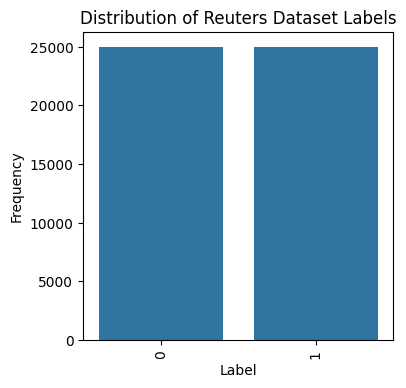

In [11]:
# Cheking if labels are balanced
all_labels = np.concatenate((train_labels, test_labels))
plt.figure(figsize=(4,4))
sns.countplot(x=all_labels)
plt.title('Distribution of Reuters Dataset Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [12]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence" (<SOS>), and "unknown" (<UNK>).
decoded_review = ' '.join([reverse_word_index.get(i - 3, '###') for i in train_data[0]])

In [13]:
decoded_review

"### this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ### is an amazing actor and now the same being director ### father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ### and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ### to the two little boy's that played the ### of norman and paul they were just brilliant children are often left out of the ### list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

## Data preparation

In [14]:
# def vectorize_sequences(sequences, dimension=10000):
#     # Create an all-zero matrix of shape (len(sequences), dimension)
#     results = np.zeros((len(sequences), dimension))
#     for i, sequence in enumerate(sequences):
#         results[i, sequence] = 1.  # set specific indices of results[i] to 1s
#     return results

# # Our vectorized training data
# x_train = vectorize_sequences(train_data)
# # Our vectorized test data
# x_test = vectorize_sequences(test_data)

In [15]:
# # Our vectorized labels
# y_train = np.asarray(train_labels).astype('float32')
# y_test = np.asarray(test_labels).astype('float32')

# print(x_train.shape)
# print(x_test.shape)
# print(y_train[0])
# print(y_train[1])
# print(y_train[2])
# print(y_test[0])
# print(y_test[1])
# print(y_test[2])

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure they have the same length
x_train_padded = pad_sequences(train_data, maxlen=500)
x_test_padded = pad_sequences(test_data, maxlen=500)

# Split the padded training data for validation
train_val_split_index = int(0.20 * len(x_train_padded))
x_val = x_train_padded[:train_val_split_index]
partial_x_train = x_train_padded[train_val_split_index:]
y_val = train_labels[:train_val_split_index]
partial_y_train = train_labels[train_val_split_index:]


In [17]:
print(x_val.shape, partial_x_train.shape)
print(y_val.shape, partial_y_train.shape)

(8500, 500) (34000, 500)
(8500,) (34000,)


## Define the Model

In [18]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Dropout

model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=500),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 16)                256016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9

In [19]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, GlobalMaxPooling1D
# from tensorflow.keras import regularizers

# model = Sequential()
# model.add(Embedding(input_dim=10000, output_dim=64))
# model.add(Conv1D(64, 5, activation='relu'))  # Shorter filter size
# model.add(GlobalMaxPooling1D())
# model.add(Dense(64, activation='relu'))
# # # model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))) 
# model.add(Dropout(0.2)) 
# model.add(Dense(32, activation='relu'))
# # model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))  
# # model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
# # model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
# model.add(Dense(1, activation='sigmoid'))

In [20]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# from keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [23]:
print(x_val.shape)
print(partial_x_train.shape)

(8500, 500)
(34000, 500)


In [24]:
# Adding EarlyStopping to the code and ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

## Train the Model

In [25]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=200,
    batch_size=256,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/200
133/133 [==============================] - 3s 9ms/step - loss: 0.6934 - binary_accuracy: 0.5009 - val_loss: 0.6931 - val_binary_accuracy: 0.5018 - lr: 1.0000e-04
Epoch 2/200
133/133 [==============================] - 1s 7ms/step - loss: 0.6927 - binary_accuracy: 0.5111 - val_loss: 0.6931 - val_binary_accuracy: 0.5025 - lr: 1.0000e-04
Epoch 3/200
133/133 [==============================] - 1s 7ms/step - loss: 0.6918 - binary_accuracy: 0.5176 - val_loss: 0.6925 - val_binary_accuracy: 0.5216 - lr: 1.0000e-04
Epoch 4/200
133/133 [==============================] - 1s 8ms/step - loss: 0.6878 - binary_accuracy: 0.5445 - val_loss: 0.6875 - val_binary_accuracy: 0.6021 - lr: 1.0000e-04
Epoch 5/200
133/133 [==============================] - 1s 8ms/step - loss: 0.6635 - binary_accuracy: 0.6230 - val_loss: 0.6383 - val_binary_accuracy: 0.7048 - lr: 1.0000e-04
Epoch 6/200
133/133 [==============================] - 1s 8ms/step - loss: 0.6107 - binary_accuracy: 0.7245 - val_loss: 0.5829 - v

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy', 'lr'])

## Evaluate

In [27]:
# Adding best validation metrics to be able follow, describe and compare the results of different models
best_epoch = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch]
best_train_loss = history.history['loss'][best_epoch]
best_val_acc = history.history['val_binary_accuracy'][best_epoch]
best_train_acc = history.history['binary_accuracy'][best_epoch]

print(f"Best Validation Loss: {best_val_loss}")
print(f"Corresponding Training Loss: {best_train_loss}")
print(f"Best Validation Accuracy: {best_val_acc}")
print(f"Corresponding Training Accuracy: {best_train_acc}")


Best Validation Loss: 0.30418023467063904
Corresponding Training Loss: 0.2454107254743576
Best Validation Accuracy: 0.8929411768913269
Corresponding Training Accuracy: 0.9447059035301208


In [28]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_padded, test_labels)

# Print formatted results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


235/235 [==============================] - 1s 3ms/step - loss: 0.2851 - binary_accuracy: 0.8979
Test Loss: 0.28509387373924255
Test Accuracy: 0.8978666663169861


## Visualize

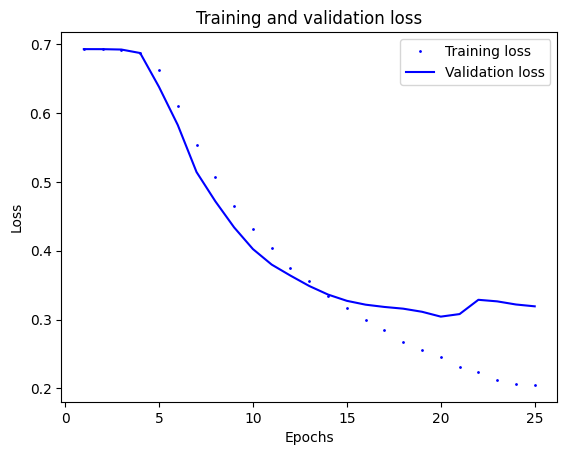

In [29]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss', markersize=1)
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

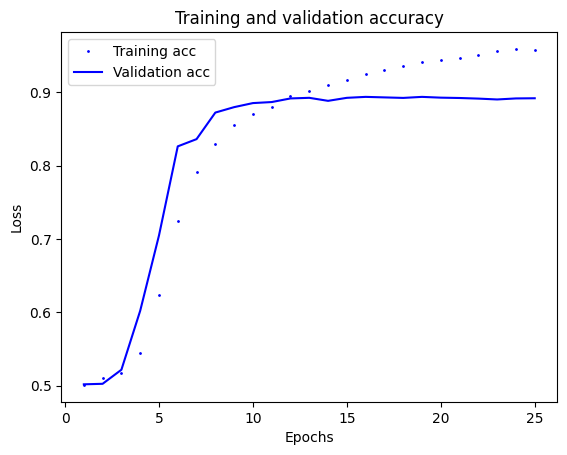

In [30]:
plt.clf()   # clear figure
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc', markersize=1)
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()